# Crop image of ROI

## Main function

Function 1：For Visium, crop the image of the region of interest (ROI) and see cell type or gene expr.  \
    - Usually, the HE image of Visium (NPC) `< 1 GB`, in our test, nuclei-segmentation is worked. \
    - The input `roi_path` is unnecessary for run `StarDist_nuclei_segmente.py`. \
    - It can be set `segment=False` in `fst.crop_img_adata()` to avoide `.obsm['spatial']` ajustifation. \
Function 2：For Visium HD, crop the ROI image with corresponding adata, save them for nuclei-segmentation. \
    - Usually, the HE image of Visium HD (CRC) `> 10 GB`, nuclei-segmentation is limited by storage. \
    - Notice: The measured region for CRC Visium HD dataset is much less than the given HE mage (~1/6). \
    - Set the selected region as `roi_path` to run `StarDist_nuclei_segmente.py`, see `ROI4_shape.csv` here. \
    - At this time, setting `segment=True` (default) in `fst.crop_img_adata()` to adjust `.obsm['spatial']`. \
    - When making nuclei-segmentation, input `roi_path` is necessary for run `StarDist_nuclei_segmente.py`. \
    - Here, we also provide the achievement of cropping the measured/whole image from one big HE image. 

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = '/mnt/lingyu/nfs_share2/Python/'

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
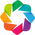

FineST version: 0.0.5


In [3]:
os.chdir(str(path) + 'FineST/FineST/')
import FineST as fst
from FineST.datasets import dataset
import FineST.plottings as fstplt
print("FineST version: %s" %fst.__version__)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
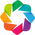

FineST version: 0.0.5


In [4]:
import importlib
import sys
sys.path.append(str(path)+'FineST/FineST/')
import FineST as fst
import FineST.plottings
importlib.reload(FineST.plottings )
from FineST.plottings  import *
print("FineST version: %s" %fst.__version__)

## 1. ROI image from NPC Visium dataset

The 10x Visium dataset (NPC_patient_1) from [Gong, et al](https://www.nature.com/articles/s41467-023-37614-6) can be downloaded from NPC1 in [Goole Drive](https://drive.google.com/drive/folders/1XQiRCyZv_xFrjjHMc3TrQ-R_srSwnGLE?dmr=1&ec=wgc-drive-globalnav-goto), where `ROI1.csv` is another ROI in paper.

**Input** \
    - `roi_path`: the pathway of the selected region using `napari` package. \
    - `img_path`: the original `.tif` HE image with high-resolution, it is about `800 MB` here. \
    - `adata_path`: the `.h5ad` adata corresponding to the HE image, from 10x Visium dataset. 
    
**Output** \
    - `crop_img_path`: the cropped image, saved in `.tif` format. \
    - `crop_adata_path`: the saved ST data, selected the `.obsm['spatial']` matched cropped image.

In [5]:
os.chdir(str(path))
roi_path = './NPC/Data/stdata/Annodata/Boundary1.csv'
img_path = './NPC/Data/stdata/GSE200310_RAW/patient1/20210809-C-AH4199551.tif'
adata_path = './SpatialData/Data/visium_nuclei_annotated_TransImp_NPC1.h5ad'
crop_img_path = './FineST/FineST_local/Dataset/CRC16um/StarDist/DataOutput/NPC1_cropped_ROI_image.tif'
crop_adata_path = './FineST/FineST_local/Dataset/CRC16um/StarDist/DataOutput/NPC1_sc_ROI.h5ad'

In [6]:
cropped_img, adata_roi = fst.crop_img_adata(roi_path, 
                                            img_path, adata_path, 
                                            crop_img_path, crop_adata_path, 
                                            segment=False, save=True)

ROI coordinates from napari package: 
    index shape-type  vertex-index        axis-0       axis-1
0      3    polygon             0   6640.434693  7203.335263
1      3    polygon             1  10347.593830  5767.797045
2      3    polygon             2  10994.374780  6635.430034
3      3    polygon             3   6750.860710  7629.264185
img shape: 
 (17351, 17319, 3)
polygon: 
 [[ 6640.434693  7203.335263]
 [10347.59383   5767.797045]
 [10994.37478   6635.430034]
 [ 6750.86071   7629.264185]]
polygon adjusted: 
 [[ 6640.434693  7203.335263]
 [10347.59383   5767.797045]
 [10994.37478   6635.430034]
 [ 6750.86071   7629.264185]]
cropped_img shape: 
 (4354, 1861, 3)
The adata: 
 AnnData object with n_obs × n_vars = 40068 × 596
    obs: 'x', 'y', 'CD70', 'cell_type'
    uns: 'spatial'
    obsm: 'TransImp_ct_pred', 'X_pca', 'spatial'
    varm: 'PCs'
The range of original adata: 
 [[1791.0, 13306.0], [1357.0, 11398.0]]


Show image shape and adata property

In [7]:
print(cropped_img.shape)
print(adata_roi)

(4354, 1861, 3)
AnnData object with n_obs × n_vars = 2671 × 596
    obs: 'x', 'y', 'CD70', 'cell_type'
    uns: 'spatial'
    obsm: 'TransImp_ct_pred', 'X_pca', 'spatial'
    varm: 'PCs'


See the range of the spatial coordinats of the 1st colnum and 2nd colnum in `adata.obsm['spatial']`

In [8]:
print(adata_roi.obsm["spatial"][:,0].min(), adata_roi.obsm["spatial"][:,0].max())
print(adata_roi.obsm["spatial"][:,1].min(), adata_roi.obsm["spatial"][:,1].max())

5784.036274559701 7612.369546383049
6680.0 10971.0


Plot the crooped ROI region in original HE image with high-resolution

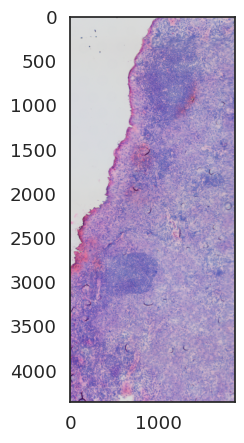

In [9]:
plt.imshow(cropped_img)
plt.show()

See the gene expression saved in `adata.X`, only contains the samples that belongs to the cropped ROI image

In [10]:
adata_roi.to_df()

,TGFB1,TGFBR1,TGFBR2,TGFB2,TGFB3,ACVR1B,ACVR1C,ACVR1,BMP2,BMPR1A,...,KDR,TREM2,SEMA6A,SEMA6B,SEMA7A,PLXNC1,SIGLEC1,THY1,VCAM1,VSIR
5,0.774141,0.319707,0.577583,0.122830,0.283841,0.543636,0.133334,0.159937,0.206030,0.291116,...,0.132993,0.207622,0.295366,0.184723,0.246018,0.219298,0.201361,0.675771,1.731593,0.791080
10,0.795293,0.316639,0.585520,0.122923,0.281216,0.530315,0.133348,0.160175,0.199356,0.299288,...,0.133524,0.205311,0.288598,0.184953,0.243017,0.217382,0.199294,0.657422,1.741211,0.804381
13,0.640507,0.363146,0.420160,0.122814,0.245757,0.758330,0.133217,0.206645,0.287286,0.322917,...,0.147430,0.198083,0.376361,0.210782,0.199315,0.234815,0.190569,0.858282,1.785016,0.787089
19,0.670296,0.321719,0.458797,0.123161,0.251093,0.687735,0.133665,0.200346,0.281791,0.320504,...,0.147013,0.174884,0.371259,0.209159,0.201994,0.236315,0.194445,0.849797,1.809629,0.786659
22,0.982387,0.514836,0.755741,0.095002,0.062766,0.500352,0.090291,0.151397,0.060689,0.266299,...,0.248259,0.226534,0.167620,0.144975,0.258439,0.220468,0.176100,0.707409,1.279280,1.011152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40058,0.817897,0.293479,0.544022,0.121565,0.230487,0.430203,0.145073,0.190130,0.159444,0.156004,...,0.168538,0.163803,0.266462,0.172920,0.218339,0.213968,0.170244,0.736762,1.824719,1.132334
40060,0.781272,0.321166,0.586289,0.123202,0.281507,0.538973,0.133565,0.160392,0.202728,0.293710,...,0.133174,0.205265,0.292292,0.185154,0.248287,0.220231,0.202191,0.665886,1.735467,0.799210
40061,0.905856,0.294248,0.596071,0.123345,0.248429,0.474897,0.142922,0.170024,0.173733,0.367548,...,0.133959,0.163414,0.263583,0.185467,0.209706,0.213531,0.186461,0.589464,1.837181,0.879274
40062,0.732795,0.324788,0.558323,0.122996,0.257767,0.606916,0.133524,0.206743,0.225200,0.283385,...,0.133140,0.181483,0.314556,0.185031,0.246949,0.222251,0.204199,0.746106,1.771362,0.813553


The NPC1 adata `visium_nuclei_annotated_TransImp_NPC1.h5ad` is obtained from nuclei-segmentaion and cell type annotation, so we can show the cells within this ROI. For others ones can only show the gene expression situation.

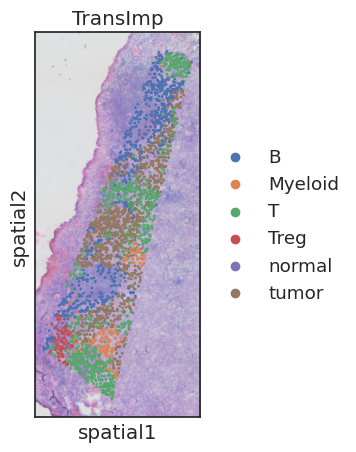

In [11]:
fig, ax = plt.subplots(1, 1, dpi=100)
sc.pl.spatial(adata_roi, img_key='hires', color="cell_type", title='TransImp', size=0.25, alpha_img=0.8, ax=ax)  

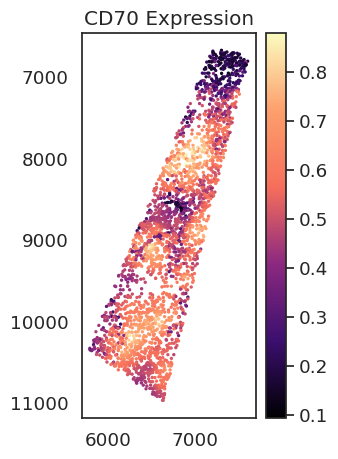

In [12]:
fstplt.gene_expr(adata_roi, adata_roi.to_df(), gene_selet='CD70', marker='o', s=2, figsize=(2.8, 5), save_path=None)

## 2. ROI image from CRC Visium HD dataset

The 10x Visium HD dataset (CRC 16um-binned) from [Oliveira, et al](https://www.biorxiv.org/content/10.1101/2024.06.04.597233v1) can be downloaded from CRC16um in [Goole Drive](https://drive.google.com/drive/folders/1XQiRCyZv_xFrjjHMc3TrQ-R_srSwnGLE?dmr=1&ec=wgc-drive-globalnav-goto). \
    - where `ROI4.csv` and `SelectedShapes.csv` are two coordinate files used in this notebook. \
    - `ROI1.csv`, `ROI2.csv` and `ROI3.csv` are other three ROIs in paper, \
    - `Rec1.csv`, `Rec2.csv` and `Rec3.csv` are rectangular regions inpaper. \
    - `Colon_Cancer_square_016um.h5ad` can be found at [figshare](https://figshare.com/articles/dataset/FineST_supplementary_data/26763241).

In [13]:
os.chdir(str(path))
roi_path = './VisiumHD/Dataset/Colon_Cancer/ResultsROIs/ROI4_shape.csv'
img_path = './VisiumHD/Dataset/Colon_Cancer/Visium_HD_Human_Colon_Cancer_tissue_image.btf'
adata_path = './VisiumHD/Dataset/Colon_Cancer_square_016um.h5ad'
crop_img_path = './FineST/FineST_local/Dataset/CRC16um/StarDist/DataOutput/cropped_ROI4_image.tif'
crop_adata_path = './FineST/FineST_local/Dataset/CRC16um/StarDist/DataOutput/CRC_square_016um_ROI4.h5ad'

If `save=None`, the `crop_img_adata` doesn't save the cropped image and adata; otherwise `save=True`.

In [14]:
cropped_img, adata_roi = fst.crop_img_adata(roi_path, 
                                            img_path, adata_path, 
                                            crop_img_path, crop_adata_path, save=None)

ROI coordinates from napari package: 
    index shape-type  vertex-index        axis-0        axis-1
0      0  rectangle             0  15391.301270  48070.133821
1      0  rectangle             1  15391.301270  51062.298407
2      0  rectangle             2  18383.465856  51062.298407
3      0  rectangle             3  18383.465856  48070.133821
img shape: 
 (48740, 75250, 3)
polygon: 
 [[15391.30127005 48070.133821  ]
 [15391.30127005 51062.29840696]
 [18383.46585601 51062.29840696]
 [18383.46585601 48070.133821  ]]
polygon adjusted: 
 [[15391.30127005 48070.133821  ]
 [15391.30127005 51062.29840696]
 [18383.46585601 51062.29840696]
 [18383.46585601 48070.133821  ]]
cropped_img shape: 
 (2992, 2992, 3)
The adata: 
 AnnData object with n_obs × n_vars = 137051 × 18085
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
The range of original adata: 
 [[40624.27653892974, 65266.45052751989], [-1887.091346549

In [15]:
print(cropped_img.shape)
print(adata_roi)

(2992, 2992, 3)
AnnData object with n_obs × n_vars = 2625 × 18085
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'


In [16]:
adata_roi.obsm['spatial']

array([[50624.28990367, 16993.61484934],
       [50230.20943304, 15878.2014645 ],
       [49510.8854646 , 17270.92326244],
       ...,
       [50577.48862309, 16116.5387753 ],
       [48120.3011603 , 16434.37248202],
       [50615.01370996, 17694.68387302]])

If `save=True`, the cropped `cropped_img` and its `adata_roi` are saved in the give path way: `crop_img_path` and `crop_adata_path`.

In [17]:
# cropped_img, adata_roi = fst.crop_img_adata(roi_path, 
#                                             img_path, adata_path, 
#                                             crop_img_path, crop_adata_path, save=True)

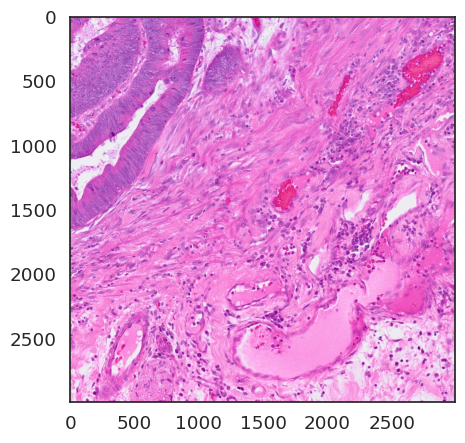

In [18]:
plt.imshow(cropped_img)
plt.show()

In [19]:
adata_roi.to_df()

,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,C1orf159,...,MT-ND2,MT-CO2,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
s_016um_00094_00170-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0
s_016um_00113_00163-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
s_016um_00089_00151-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,5.0,7.0,2.0,0.0,4.0,0.0,0.0,1.0
s_016um_00097_00172-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
s_016um_00103_00143-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3.0,1.0,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s_016um_00108_00152-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,4.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0
s_016um_00105_00129-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,37.0,48.0,29.0,8.0,13.0,46.0,3.0,1.0,27.0
s_016um_00109_00169-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0
s_016um_00103_00127-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,17.0,39.0,21.0,12.0,8.0,45.0,4.0,4.0,17.0


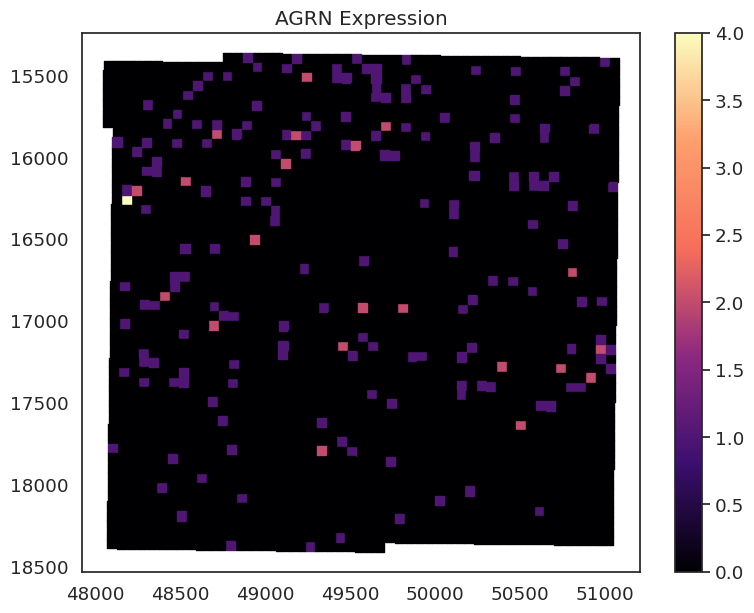

In [20]:
fstplt.gene_expr(adata_roi, adata_roi.to_df(), gene_selet='AGRN', marker='s', s=43, save_path=None)

## 3. Whole image from CRC Visium HD dataset

The 10x Visium HD dataset (CRC 16um-binned) from [Oliveira, et al](https://www.biorxiv.org/content/10.1101/2024.06.04.597233v1) can be downloaded from CRC16um in [Goole Drive](https://drive.google.com/drive/folders/1XQiRCyZv_xFrjjHMc3TrQ-R_srSwnGLE?dmr=1&ec=wgc-drive-globalnav-goto). \
    - where `ROI4.csv` and `SelectedShapes.csv` are two coordinate files used in this notebook. \
    - `ROI1.csv`, `ROI2.csv` and `ROI3.csv` are other three ROIs in paper, \
    - `Rec1.csv`, `Rec2.csv` and `Rec3.csv` are rectangular regions inpaper. \
    - `Colon_Cancer_square_016um.h5ad` can be found at [figshare](https://figshare.com/articles/dataset/FineST_supplementary_data/26763241).

In [21]:
os.chdir(str(path))
roi_path = './VisiumHD/Dataset/Colon_Cancer/ResultsROIs/SelectedShapes.csv'
img_path = './VisiumHD/Dataset/Colon_Cancer/Visium_HD_Human_Colon_Cancer_tissue_image.btf'
adata_path = './VisiumHD/Dataset/Colon_Cancer_square_016um.h5ad'
crop_img_path = './FineST/FineST_local/Dataset/CRC16um/StarDist/DataOutput/cropped_ROI_image.tif'
crop_adata_path = './FineST/FineST_local/Dataset/CRC16um/StarDist/DataOutput/CRC_square_016um_ROI.h5ad'

In [22]:
cropped_img, adata_roi = fst.crop_img_adata(roi_path, 
                                            img_path, adata_path, 
                                            crop_img_path, crop_adata_path, save=True)

ROI coordinates from napari package: 
    index shape-type  vertex-index        axis-0        axis-1
0      0    polygon             0  22446.377777  40506.552504
1      0    polygon             1  22733.185336  65136.151680
2      0    polygon             2   -749.183601  65207.853570
3      0    polygon             3   -785.034546  40900.912899
img shape: 
 (48740, 75250, 3)
polygon: 
 [[22446.37777685 40506.55250441]
 [22733.18533639 65136.15168022]
 [ -749.18360124 65207.8535701 ]
 [ -785.03454618 40900.91289879]]
polygon adjusted: 
 [[22446.37777685 40506.55250441]
 [22733.18533639 65136.15168022]
 [    0.         65207.8535701 ]
 [    0.         40900.91289879]]
cropped_img shape: 
 (22734, 24701, 3)
The adata: 
 AnnData object with n_obs × n_vars = 137051 × 18085
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
The range of original adata: 
 [[40624.27653892974, 65266.45052751989], [-1887.0913465

In [23]:
print(cropped_img.shape)
print(adata_roi)

(22734, 24701, 3)
AnnData object with n_obs × n_vars = 136922 × 18085
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'


In [24]:
print(adata_roi.obsm["spatial"][:,0].min(), adata_roi.obsm["spatial"][:,0].max())
print(adata_roi.obsm["spatial"][:,1].min(), adata_roi.obsm["spatial"][:,1].max())

40624.27653892974 65167.50360834386
0.4282210569424407 22680.620734693424


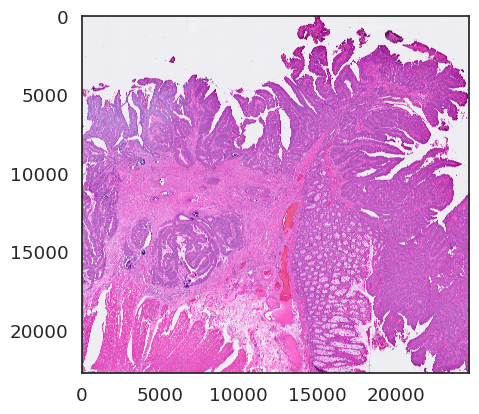

In [25]:
plt.imshow(cropped_img)
plt.show()

In [26]:
adata_roi.to_df()

,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,C1orf159,...,MT-ND2,MT-CO2,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
s_016um_00052_00082-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s_016um_00010_00367-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,10.0,31.0,53.0,36.0,15.0,17.0,54.0,3.0,3.0,10.0
s_016um_00163_00399-1,0.0,0.0,0.0,0.0,0.0,1.0,8.0,2.0,0.0,0.0,...,0.0,1.0,2.0,1.0,2.0,1.0,5.0,0.0,1.0,1.0
s_016um_00238_00388-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,6.0,4.0,1.0,2.0,12.0,2.0,0.0,0.0
s_016um_00144_00175-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s_016um_00375_00231-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,7.0,14.0,15.0,3.0,4.0,14.0,5.0,1.0,4.0
s_016um_00109_00223-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2.0,5.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0
s_016um_00039_00175-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
s_016um_00037_00193-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


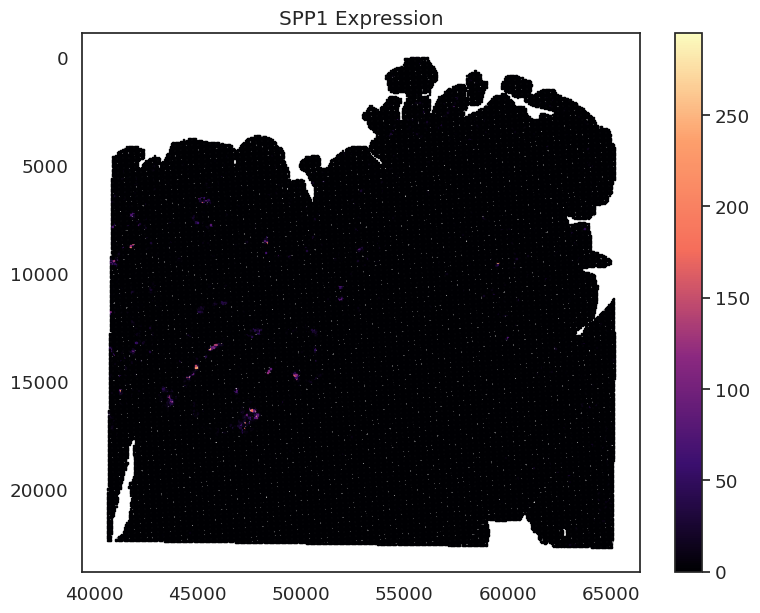

In [27]:
fstplt.gene_expr(adata_roi, adata_roi.to_df(), gene_selet='SPP1', marker='s', s=0.5, save_path=None)